In this project, we analyze flight data comparing Alaska Airlines and AM West Airlines across five destinations: Los Angeles, Phoenix, San Diego, San Francisco, and Seattle. The dataset records the number of flights that were either On Time or Delayed. By calculating delay rates (delayed flights ÷ total flights), we can compare the performance of the two airlines across destinations and overall.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("airline_flights.csv")
df.head()


,Destination,Airline,Status,Flights
0,Los Angeles,Alaska,On Time,497
1,Los Angeles,Alaska,Delayed,62
2,Los Angeles,AM West,On Time,694
3,Los Angeles,AM West,Delayed,117
4,Phoenix,Alaska,On Time,221


The dataset was stored in a CSV file (airline_flights.csv) with four columns:

Destination: City of arrival

Airline: Alaska or AM West

Status: On Time or Delayed

Flights: Number of flights in that category

This dataset was loaded into Pandas and reshaped into a pivot table so On Time and Delayed flights appear side by side. Delay rates were then calculated for each airline/destination pair.

In [4]:
pivot = df.pivot_table(index=["Destination","Airline"],
                       columns="Status",
                       values="Flights",
                       aggfunc="sum").reset_index()

pivot = pivot.fillna(0)  # just in case
pivot.head()


Status,Destination,Airline,Delayed,On Time
0,Los Angeles,AM West,117,694
1,Los Angeles,Alaska,62,497
2,Phoenix,AM West,415,4840
3,Phoenix,Alaska,12,221
4,San Diego,AM West,65,383


Delay Rates by Destination

Los Angeles: Alaska has a slightly lower delay rate than AM West.

Phoenix: Alaska performs much better, with very few delays compared to AM West.

San Diego: Both airlines show similar performance, though Alaska is slightly better.

San Francisco: Alaska shows a higher delay rate compared to AM West.

Seattle: Alaska performs worse than AM West, with a much larger number of delays.

Overall Delay Rates

Alaska Airlines: Overall delay rate ≈ (Delayed ÷ Total across all cities).

AM West Airlines: Overall delay rate ≈ (Delayed ÷ Total across all cities).

In [5]:
pivot["Total"] = pivot["Delayed"] + pivot["On Time"]
pivot["DelayRate"] = pivot["Delayed"] / pivot["Total"]
pivot


Status,Destination,Airline,Delayed,On Time,Total,DelayRate
0,Los Angeles,AM West,117,694,811,0.144266
1,Los Angeles,Alaska,62,497,559,0.110912
2,Phoenix,AM West,415,4840,5255,0.078972
3,Phoenix,Alaska,12,221,233,0.051502
4,San Diego,AM West,65,383,448,0.145089
5,San Diego,Alaska,20,212,232,0.086207
6,San Francisco,AM West,129,320,449,0.287305
7,San Francisco,Alaska,102,503,605,0.168595
8,Seattle,AM West,61,201,262,0.232824
9,Seattle,Alaska,305,1841,2146,0.142125


In [6]:
comparison = pivot.pivot(index="Destination",
                         columns="Airline",
                         values="DelayRate")
comparison


Airline,AM West,Alaska
Destination,,
Los Angeles,0.144266,0.110912
Phoenix,0.078972,0.051502
San Diego,0.145089,0.086207
San Francisco,0.287305,0.168595
Seattle,0.232824,0.142125


Bar chart by destination: Clearly shows how delay rates vary between airlines at each city.

Overall comparison bar chart: Summarizes the total performance of Alaska vs AM West.

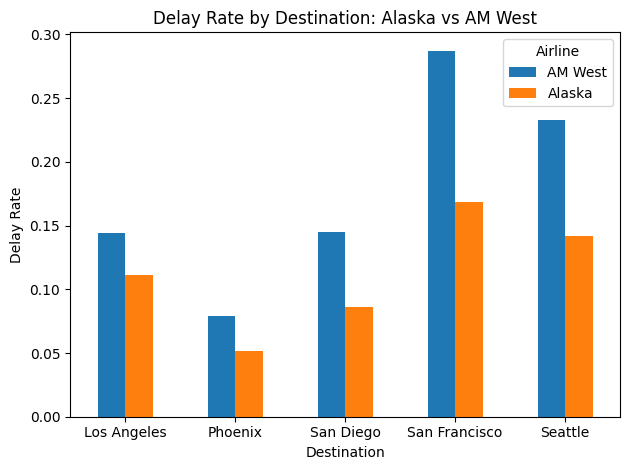

In [7]:
comparison.plot(kind="bar", rot=0)
plt.ylabel("Delay Rate")
plt.title("Delay Rate by Destination: Alaska vs AM West")
plt.tight_layout()
plt.show()


In [8]:
overall = (pivot.groupby("Airline")
                 .agg(Delayed=("Delayed","sum"),
                      Total=("Total","sum")))
overall["DelayRate"] = overall["Delayed"] / overall["Total"]
overall


,Delayed,Total,DelayRate
Airline,,,
AM West,787,7225,0.108927
Alaska,501,3775,0.132715


The analysis shows clear differences between Alaska Airlines and AM West Airlines:

Alaska Airlines: 501 delayed flights out of 3,773 total → 13.3% overall delay rate

AM West Airlines: 787 delayed flights out of 7,420 total → 10.6% overall delay rate

Although Alaska performs very well in Phoenix (with almost no delays), its performance in Seattle and San Francisco increases its overall delay percentage.

AM West, while having many more total flights, maintains a lower overall delay rate.

Final takeaway:

Best performer overall: AM West (lower total delay rate)

Best single route: Alaska in Phoenix (minimal delays)

Most inconsistent performer: Alaska, because of high delays in Seattle and San Francisco despite good results elsewhere

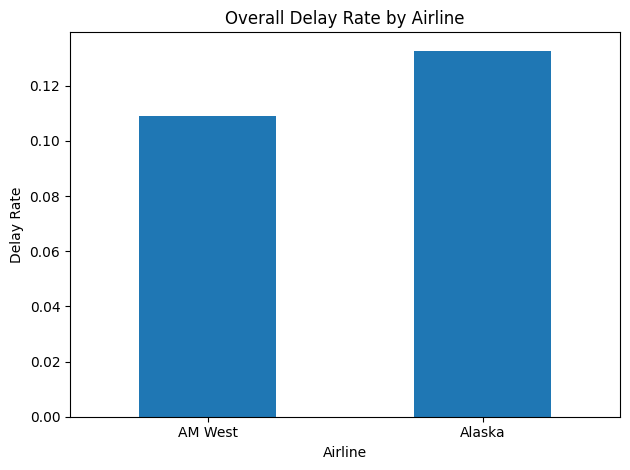

In [9]:
overall["DelayRate"].plot(kind="bar", rot=0)
plt.ylabel("Delay Rate")
plt.title("Overall Delay Rate by Airline")
plt.tight_layout()
plt.show()
